In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("miguelmallqui17/peru-student-enrollment-data-2023")

print("Path to dataset files:", path)


c:\Users\Beatriz\Documents\UFPB\P5\Aprendizagem Supervisionada\Projeto Aplicado\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Beatriz\.cache\kagglehub\datasets\miguelmallqui17\peru-student-enrollment-data-2023\versions\1


https://www.kaggle.com/datasets/miguelmallqui17/peru-student-enrollment-data-2023?select=peru_student_enrollment_data_2023.csv

# About Dataset
This dataset contains student enrollment data from a Peruvian university for the year 2023. It presents challenges such as missing values ​​and inconsistent formatting, particularly in gender representation (1, 2, M, F, U), which requires data cleaning and transformation. The dataset allows for in-depth analysis of enrollment trends, among other indicators.

Description:

ENROLLMENT – Type of student enrollment:
- New: Student enrolling for the first time.
- Re-enrolled: Student continuing studies without interruption.
- Reinstated: Student returning after a period of inactivity.

TUITION PAYMENT MARCH 2022 – Indicates whether the student paid tuition in March 2022 (0 = No, 1 = Yes).

TUITION PAYMENT MARCH 2023 – Indicates whether the student paid tuition in March 2023 (0 = No, 1 = Yes).

GENDER – Student's gender (M, F, U, 1 ->(M), 2 ->(F)).

PROGRAM/MAJOR – Academic program or major the student is enrolled in.

SHIFT/SCHEDULE – Study schedule (Morning, Afternoon, Night, Mixed).

STUDY MODE – Study modality:

- On-site: Classes held at a physical campus.
- Online: Fully online classes.
- Remote: Online classes with some in-person activities.
- To be determined: Study mode not yet selected.

AGE RANGE OF ENROLLED STUDENT – Age range of enrolled students.

DEPARTMENT – Department where the student resides or studies.

PROVINCE – Province where the student resides or studies.

DISTRICT – District where the student resides or studies.

TYPE OF EDUCATIONAL INSTITUTION – Type of institution the student comes from (School, Institute, etc.).

INSTITUTION STATUS – Status of the institution (Public or Private).

BENEFIT DISCOUNTS – Indicates whether the student receives any financial benefits or discounts.

NUMBER OF ENROLLED COURSES – Number of courses the student is enrolled in.

AT-RISK COURSE – Indicates whether the student has courses at risk of failure.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('peru_student_enrollment_data_2023.csv', sep=';')

In [5]:
data

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,TYPE OF EDUCATIONAL INSTITUTION,EDUCATIONAL INSTITUTION,INSTITUTION STATUS,DEPARTMENT,PROVINCE,DISTRICT,...,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
0,Nuevo,0,0,M,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,BRENA,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0
1,Nuevo,1,0,M,COLEGIO,COLEGIO SISE,PRIVADA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0
2,Nuevo,1,1,F,NaN,NaN,NaN,LIMA,LIMA,JESUS MARIA,...,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0
3,Nuevo,0,0,F,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,LIMA,LIMA,ATE,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0
4,Nuevo,1,1,F,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,SURQUILLO,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,Reinscrito,1,1,F,NaN,UNIVERSIDAD,NaN,AREQUIPA,AREQUIPA,CAYMA,...,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,2,0
37578,Reinscrito,1,1,F,NaN,NaN,NaN,LIMA,LIMA,LURIGANCHO,...,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37579,Reinscrito,1,1,F,NaN,NaN,NaN,LIMA,LIMA,LIMA,...,UTP Virtual,Fac. Adm. Y Neg.,ADM. DE EMPRESAS (VIRTUAL),NOCHE,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37580,Reinscrito,1,1,M,UNIVERSIDAD,PONTIFICIAUNIVERSIDADCATÓLIC,PRIVADA,LIMA,LIMA,CHORRILLOS,...,UTP Virtual,Fac. Ing. Ind. Y Mec.,ING. INDUSTRIAL (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0


In [6]:
print("\nData info:")
data.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37582 entries, 0 to 37581
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ENROLLMENT                       37582 non-null  object
 1   TUITION PAYMENT MARCH 2022       37582 non-null  int64 
 2   TUITION PAYMENT MARCH 2023       37582 non-null  int64 
 3   GENDER                           37580 non-null  object
 4   TYPE OF EDUCATIONAL INSTITUTION  15868 non-null  object
 5   EDUCATIONAL INSTITUTION          18212 non-null  object
 6   INSTITUTION STATUS               15868 non-null  object
 7   DEPARTMENT                       36846 non-null  object
 8   PROVINCE                         36846 non-null  object
 9   DISTRICT                         36846 non-null  object
 10  CLASSIFICATION                   37581 non-null  object
 11  CAMPUS                           37582 non-null  object
 12  FACULTY             

In [7]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       TUITION PAYMENT MARCH 2022  TUITION PAYMENT MARCH 2023  \
count                37582.000000                37582.000000   
mean                     0.861476                    0.841334   
std                      0.345453                    0.365370   
min                      0.000000                    0.000000   
25%                      1.000000                    1.000000   
50%                      1.000000                    1.000000   
75%                      1.000000                    1.000000   
max                      1.000000                    1.000000   

       NUMBER OF ENROLLED COURSES  AT-RISK COURSE  
count                37582.000000    37582.000000  
mean                     1.940078        0.148422  
std                      0.986984        0.512012  
min                      0.000000        0.000000  
25%                      1.000000        0.000000  
50%                      2.000000        0.000000  
75%                      3.00

In [8]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
ENROLLMENT                             0
TUITION PAYMENT MARCH 2022             0
TUITION PAYMENT MARCH 2023             0
GENDER                                 2
TYPE OF EDUCATIONAL INSTITUTION    21714
EDUCATIONAL INSTITUTION            19370
INSTITUTION STATUS                 21714
DEPARTMENT                           736
PROVINCE                             736
DISTRICT                             736
CLASSIFICATION                         1
CAMPUS                                 0
FACULTY                                1
PROGRAM/MAJOR                          1
SHIFT/SCHEDULE                        58
BENEFIT DISCOUNTS                      0
STUDY MODE                             0
AGE RANGE OF ENROLLED STUDENT          4
DISABILITY                             0
NUMBER OF ENROLLED COURSES             0
AT-RISK COURSE                         0
dtype: int64


In [9]:
# Drop columns with too many Nan:
data = data.drop(['TYPE OF EDUCATIONAL INSTITUTION','EDUCATIONAL INSTITUTION','INSTITUTION STATUS'], axis=1)

In [10]:
# Delete rows with NaN values:
data = data.dropna()

In [11]:
print(data.isnull().sum())

ENROLLMENT                       0
TUITION PAYMENT MARCH 2022       0
TUITION PAYMENT MARCH 2023       0
GENDER                           0
DEPARTMENT                       0
PROVINCE                         0
DISTRICT                         0
CLASSIFICATION                   0
CAMPUS                           0
FACULTY                          0
PROGRAM/MAJOR                    0
SHIFT/SCHEDULE                   0
BENEFIT DISCOUNTS                0
STUDY MODE                       0
AGE RANGE OF ENROLLED STUDENT    0
DISABILITY                       0
NUMBER OF ENROLLED COURSES       0
AT-RISK COURSE                   0
dtype: int64


In [12]:
data['GENDER'].value_counts()

GENDER
M    20555
F    15892
U      200
2       85
1       52
Name: count, dtype: int64

In [23]:
df = data

# 1. Identify Unique Values
print("\nUnique values in 'gender' column:", df['GENDER'].unique())


Unique values in 'gender' column: ['M' 'F' 'U' '2' '1']


In [24]:
# 2. Define a Mapping for Transformation
gender_mapping = {
    1: 'M',
    '1': 'M',  # Handle potential string representations
    2: 'F',
    '2': 'F', # Handle potential string representations
    'M': 'M',
    'F': 'F',
    'U': 'U'
}

In [26]:
# 3. Apply the Mapping using .map()

# df['gender_cleaned'] = df['GENDER'].map(gender_mapping)
# print("\nDataFrame after mapping:\n")

df['GENDER'] = df['GENDER'].map(gender_mapping)
print("\nDataFrame after replacing 'GENDER' column:\n")
df


DataFrame after replacing 'GENDER' column:



,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,DEPARTMENT,PROVINCE,DISTRICT,CLASSIFICATION,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE,gender_cleaned
0,Nuevo,0,0,M,LIMA,LIMA,BRENA,Carreras Pregrado,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0,M
1,Nuevo,1,0,M,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,Carreras Pregrado,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0,M
2,Nuevo,1,1,F,LIMA,LIMA,JESUS MARIA,Carreras Pregrado,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0,F
3,Nuevo,0,0,F,LIMA,LIMA,ATE,Carreras Pregrado 50-50,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0,F
4,Nuevo,1,1,F,LIMA,LIMA,SURQUILLO,Carreras Pregrado,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,Reinscrito,1,1,F,AREQUIPA,AREQUIPA,CAYMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,2,0,F
37578,Reinscrito,1,1,F,LIMA,LIMA,LURIGANCHO,Carreras Pregrado Virtual,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0,F
37579,Reinscrito,1,1,F,LIMA,LIMA,LIMA,Carreras Pregrado Virtual,UTP Virtual,Fac. Adm. Y Neg.,ADM. DE EMPRESAS (VIRTUAL),NOCHE,SIN BENEFICIO,Virtual,5. >=30,No,3,0,F
37580,Reinscrito,1,1,M,LIMA,LIMA,CHORRILLOS,Carreras Pregrado Virtual,UTP Virtual,Fac. Ing. Ind. Y Mec.,ING. INDUSTRIAL (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0,M


In [ ]:
# 1. Identify Unique Values
print("\nUnique values in 'GENDER' column:", df['GENDER'].unique())



Unique values in 'GENDER' column: ['M' 'F' 'U']


In [33]:
df = df.drop(columns=['gender_cleaned'])

In [37]:
data = df
del df

In [40]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 30)

Unique values in column 'ENROLLMENT':
['Nuevo' 'Reincorporado' 'Reinscrito']
------------------------------
Unique values in column 'TUITION PAYMENT MARCH 2022':
[0 1]
------------------------------
Unique values in column 'TUITION PAYMENT MARCH 2023':
[0 1]
------------------------------
Unique values in column 'GENDER':
['M' 'F' 'U']
------------------------------
Unique values in column 'DEPARTMENT':
['LIMA' 'CALLAO' 'AMAZONAS' 'ICA' 'AREQUIPA' 'SAN MARTIN' 'JUNIN'
 'LA LIBERTAD' 'HUANUCO' 'AYACUCHO' 'ANCASH' 'PASCO' 'CUSCO' 'LAMBAYEQUE'
 'HUANCAVELICA' 'PIURA' 'CAJAMARCA' 'APURIMAC' 'PUNO' 'UCAYALI'
 'MADRE DE DIOS' 'LORETO' 'TACNA' 'MOQUEGUA' 'TUMBES']
------------------------------
Unique values in column 'PROVINCE':
['LIMA' 'CALLAO' 'RODRIGUEZ DE MENDOZA' 'CHINCHA' 'CAYLLOMA' 'SAN MARTIN'
 'CANETE' 'YAULI' 'NAZCA' 'HUAURA' 'TRUJILLO' 'HUANCAYO' 'HUANUCO'
 'BARRANCA' 'ICA' 'HUAROCHIRI' 'CANTA' 'OYON' 'VICTOR FAJARDO' 'AREQUIPA'
 'HUAMANGA' 'SANTA' 'PARINACOCHAS' 'OXAPAMPA' 'CUSCO

In [42]:
# Deleting columns that have too many unique values:
data = data.drop(columns=['DISTRICT', 'PROVINCE']) # Deixei 'PROGRAM/MAJOR' por achar importante

In [43]:
# Handle categorical features
data = pd.get_dummies(data, columns=['GENDER','DISABILITY','STUDY MODE','SHIFT/SCHEDULE','PROGRAM/MAJOR'], drop_first=True)
# drop_first=True to avoid multicollinearity

In [46]:
# More categorical features
data = pd.get_dummies(data, columns=['DEPARTMENT','ENROLLMENT','CLASSIFICATION','CAMPUS','FACULTY','AGE RANGE OF ENROLLED STUDENT','BENEFIT DISCOUNTS'], drop_first=True)

In [47]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 30)

Unique values in column 'TUITION PAYMENT MARCH 2022':
[0 1]
------------------------------
Unique values in column 'TUITION PAYMENT MARCH 2023':
[0 1]
------------------------------
Unique values in column 'NUMBER OF ENROLLED COURSES':
[0 3 1 2 4 5 6]
------------------------------
Unique values in column 'AT-RISK COURSE':
[0 2 1 3 5 4]
------------------------------
Unique values in column 'GENDER_M':
[ True False]
------------------------------
Unique values in column 'GENDER_U':
[False  True]
------------------------------
Unique values in column 'DISABILITY_Si':
[False  True]
------------------------------
Unique values in column 'STUDY MODE_Remoto':
[False  True]
------------------------------
Unique values in column 'STUDY MODE_Virtual':
[False  True]
------------------------------
Unique values in column 'SHIFT/SCHEDULE_MIXTO':
[ True False]
------------------------------
Unique values in column 'SHIFT/SCHEDULE_NOCHE':
[False  True]
------------------------------
Unique values i


TUITION PAYMENT MARCH 2023 distribution:
TUITION PAYMENT MARCH 2023
1    30993
0     5791
Name: count, dtype: int64 TUITION PAYMENT MARCH 2023
1    0.842567
0    0.157433
Name: proportion, dtype: float64


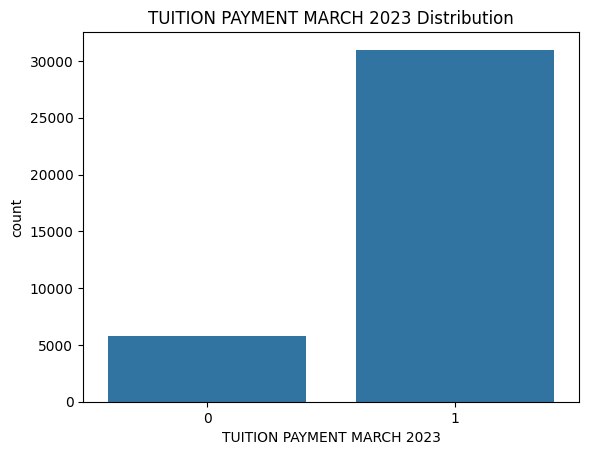

In [35]:
# Check the distribution of the target variable (Churn)
print("\nTUITION PAYMENT MARCH 2023 distribution:")
print(data['TUITION PAYMENT MARCH 2023'].value_counts(), data['TUITION PAYMENT MARCH 2023'].value_counts(normalize=True))
sns.countplot(x='TUITION PAYMENT MARCH 2023', data=data)
plt.title('TUITION PAYMENT MARCH 2023 Distribution')
plt.show()

Feature engineering:

In [48]:
# Explicitly cast the dummy columns to integer type
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)

In [49]:
data

,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,NUMBER OF ENROLLED COURSES,AT-RISK COURSE,GENDER_M,GENDER_U,DISABILITY_Si,STUDY MODE_Remoto,STUDY MODE_Virtual,SHIFT/SCHEDULE_MIXTO,...,AGE RANGE OF ENROLLED STUDENT_2. 19-20,AGE RANGE OF ENROLLED STUDENT_3. 21-23,AGE RANGE OF ENROLLED STUDENT_4. 24-29,AGE RANGE OF ENROLLED STUDENT_5. >=30,BENEFIT DISCOUNTS_BECA TALENTO UTP,BENEFIT DISCOUNTS_CONVENIOS,BENEFIT DISCOUNTS_MADREDIOSENSE - UTP,BENEFIT DISCOUNTS_SIN BENEFICIO,BENEFIT DISCOUNTS_SOCIOECONOMICA - UTP,BENEFIT DISCOUNTS_SOCIOECONOMICA ESPECIAL - UTP
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,0,3,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,1,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,1,1,2,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
37578,1,1,3,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
37579,1,1,3,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
37580,1,1,3,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0


In [50]:
data.columns

Index(['TUITION PAYMENT MARCH 2022', 'TUITION PAYMENT MARCH 2023',
       'NUMBER OF ENROLLED COURSES', 'AT-RISK COURSE', 'GENDER_M', 'GENDER_U',
       'DISABILITY_Si', 'STUDY MODE_Remoto', 'STUDY MODE_Virtual',
       'SHIFT/SCHEDULE_MIXTO',
       ...
       'AGE RANGE OF ENROLLED STUDENT_2. 19-20',
       'AGE RANGE OF ENROLLED STUDENT_3. 21-23',
       'AGE RANGE OF ENROLLED STUDENT_4. 24-29',
       'AGE RANGE OF ENROLLED STUDENT_5. >=30',
       'BENEFIT DISCOUNTS_BECA TALENTO UTP', 'BENEFIT DISCOUNTS_CONVENIOS',
       'BENEFIT DISCOUNTS_MADREDIOSENSE - UTP',
       'BENEFIT DISCOUNTS_SIN BENEFICIO',
       'BENEFIT DISCOUNTS_SOCIOECONOMICA - UTP',
       'BENEFIT DISCOUNTS_SOCIOECONOMICA ESPECIAL - UTP'],
      dtype='object', length=156)

In [51]:
# Separate features (X) and target (y)
X = data.drop('TUITION PAYMENT MARCH 2023', axis=1)
y = data['TUITION PAYMENT MARCH 2023']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Split data into training and testing sets (already done in the previous step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
# Now you can proceed to feature scaling (optional but often recommended)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# X_train_scaled and X_test_scaled are now your scaled feature sets
# You will use these for training your models in the next steps.
print("\nShape of training features after engineering and scaling:", X_train_scaled.shape)
print("Shape of testing features after engineering and scaling:", X_test_scaled.shape)


Shape of training features after engineering and scaling: (29427, 155)
Shape of testing features after engineering and scaling: (7357, 155)


Model Selection and Training

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logistic_regression = LogisticRegression(random_state=42)

In [58]:
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [59]:
y_pred_lr = logistic_regression.predict(X_test_scaled)

In [60]:
y_pred_proba_lr = logistic_regression.predict_proba(X_test_scaled)[:, 1]

In [61]:
# Evaluate performance:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [62]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_lr))
print("-" * 30)

Logistic Regression:
Accuracy: 0.9811064292510534
Precision: 0.978219696969697
Recall: 0.9998386836586546
F1-Score: 0.9889110490626246
ROC AUC: 0.9601979788929129
------------------------------


In [63]:
coefficients = logistic_regression.coef_[0]

In [64]:
feature_names = X_train.columns 

In [72]:
# Assuming coefficients_df is your DataFrame
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows') # Optional: Reset to default after printing

In [73]:
# Create a DataFrame to display coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print("Logistic Regression Coefficients:")
print(coefficients_df)

Logistic Regression Coefficients:
                                               Feature  Coefficient
0                           TUITION PAYMENT MARCH 2022     4.328303
120                              ENROLLMENT_Reinscrito     0.422818
24            PROGRAM/MAJOR_ADMINISTRACION Y MARKETING     0.200109
82                PROGRAM/MAJOR_INGENIERÍA DE SOFTWARE     0.198406
42                        PROGRAM/MAJOR_ING. BIOMEDICA     0.193349
38           PROGRAM/MAJOR_DISEÑO DIGITAL PUBLICITARIO     0.183892
46        PROGRAM/MAJOR_ING. DE REDES Y COMUNICACIONES     0.158256
118                                 DEPARTMENT_UCAYALI     0.155732
107                              DEPARTMENT_LAMBAYEQUE     0.155071
28             PROGRAM/MAJOR_COMUNICACIÓN Y PUBLICIDAD     0.138054
150                        BENEFIT DISCOUNTS_CONVENIOS     0.136318
88                             PROGRAM/MAJOR_NUTRICIÓN     0.134288
66                         PROGRAM/MAJOR_ING. MARITIMA     0.133906
117           

In [66]:
# Get the intercept
intercept = logistic_regression.intercept_[0]
print(f"\nLogistic Regression Intercept: {intercept:.4f}")


Logistic Regression Intercept: 2.3044


Probability >= 0.5: The model predicts the customer will churn (class 1).

Probability < 0.5: The model predicts the customer will not churn (class 0).